# Brain Tumor MRI Classification

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

## Color

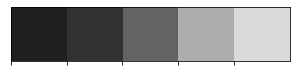

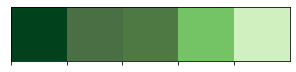

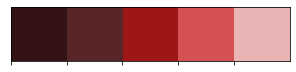

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

## Data Preperation

In [3]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [4]:
X_train = []
y_train = []
image_size = 128

 We obtain the kaggle database: [Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/discussion)

To connect that database to Colab, you can follow the following [tutorial](https://platzi.com/tutoriales/1794-pandas/6926-usando-la-api-de-kaggle-con-google-colab-para-carga-y-descarga-de-datasets/#:~:text=Dataset%20a%20usar%20en%20esta%20rutina%3A&text=Lo%20primero%20que%20debemos%20hacer,a%20la%20api%20de%20Kaggle.) 

In [5]:
for i in labels:
    folderPath = os.path.join('/content/drive/My Drive/Colab Notebooks/db','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

100%|██████████| 827/827 [00:05<00:00, 149.34it/s]


In [6]:
for i in labels:
    folderPath = os.path.join('/content/drive/My Drive/Colab Notebooks/db','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

100%|██████████| 74/74 [00:00<00:00, 87.66it/s]


In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)

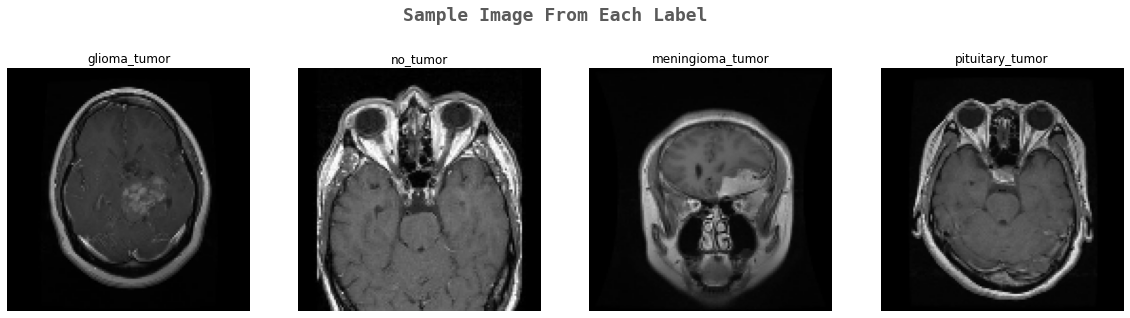

In [8]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [9]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [10]:
X_train.shape

(3222, 128, 128, 3)

Dividing the dataset into Training and Testing sets.

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

Performing One Hot Encoding on the labels after converting it into numerical values:

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2899, 128, 128, 3)
(2899,)
(323, 128, 128, 3)
(323,)


In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
from keras import layers, models, regularizers

In [15]:
model = Sequential()

# Adding first Conv2D layer with 32 filters and 2x2 kernel size and 'same' padding
model.add(Conv2D(32, (2, 2), padding='same', input_shape=(128,128,3)))
model.add(Activation('relu'))

# Adding second Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))

# Adding Max Pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer with 25% dropout rate
model.add(Dropout(0.2))

# Adding third Conv2D layer with 64 filters and 3x3 kernel size and 'same' padding
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))

# Adding fourth Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Adding Max Pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding Dropout layer with 25% dropout rate
model.add(Dropout(0.25))

# Flattening the output from the previous layer
model.add(Flatten())

# Adding a dense layer with 128 neurons
model.add(Dense(128))
model.add(Activation('relu'))

# Adding another dropout layer with 50% dropout rate
model.add(Dropout(0.5))

# Adding a dense layer with 64 neurons
model.add(Dense(64))
model.add(Activation('relu'))

# Adding the output layer with 4 neurons and softmax activation
model.add(Dense(4, Activation('softmax')))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                        

In [17]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001) # Set the learning rate to 0.0001
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [21]:
# Fit the model and save the history
history = model.fit(
    X_train, y_train, 
    batch_size=50, epochs=30, 
    validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
58/58 [==============================] - 5s 78ms/step - loss: 0.5951 - accuracy: 0.7330 - val_loss: 0.5984 - val_accuracy: 0.7554
Epoch 2/30
58/58 [==============================] - 5s 78ms/step - loss: 0.5673 - accuracy: 0.7434 - val_loss: 0.5513 - val_accuracy: 0.7585
Epoch 3/30
58/58 [==============================] - 5s 78ms/step - loss: 0.5326 - accuracy: 0.7627 - val_loss: 0.5333 - val_accuracy: 0.8050
Epoch 4/30
58/58 [==============================] - 5s 78ms/step - loss: 0.5238 - accuracy: 0.7613 - val_loss: 0.5030 - val_accuracy: 0.8050
Epoch 5/30
58/58 [==============================] - 5s 80ms/step - loss: 0.5228 - accuracy: 0.7672 - val_loss: 0.5094 - val_accuracy: 0.8080
Epoch 6/30
58/58 [==============================] - 5s 81ms/step - loss: 0.4868 - accuracy: 0.7816 - val_loss: 0.4857 - val_accuracy: 0.7988
Epoch 7/30
58/58 [==============================] - 5s 79ms/step - loss: 0.4582 - accuracy: 0.7986 - val_loss: 0.4390 - val_accuracy: 0.8204
Epoch 8/30
58

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

11/11 [==============================] - 0s 12ms/step - loss: 0.3959 - accuracy: 0.8762
Test loss: 0.3959241211414337
Test accuracy: 0.8761609792709351


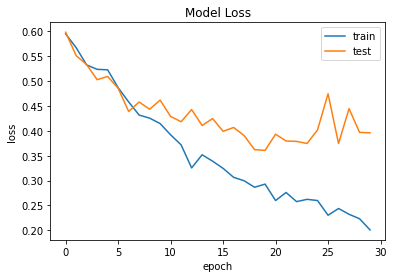

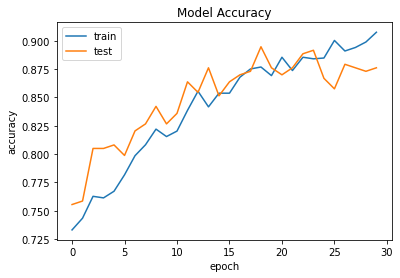

In [23]:
# Plot the training history for both loss and accuracy
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
